#Project





In [223]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [224]:
import numpy as np
import pandas as pd

In [225]:
!pip install -U tweepy

##Secret Keys:



In [226]:
API_key = "uVWaqsz4ktqZrDt3mMNFTtcZD"
API_key_SECRET = "DTclR66I1C9R8rjbR6gsBcU1fAbTGjxnEthpqvBGHKbFpagjM8"
ACCESS_TOKEN = "1505812795014914049-NUwz8VQyZ5R4sxzshkPyPIailgXcef"
ACCESS_TOKEN_SECRET = "cgx96SSAxQ88BdSVtvEKy7Os1WwGWeX8ryRMm8Ju30vPU"
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAL7baQEAAAAAWYgQgt8n%2FWANxz2BLRnCMqc47%2Bs%3DgVYbpACoMrLku6zuXol4wjcWwGJJPXCwyDrIIjZLWRwi6uhSZv"

##Extracting Tweets:

In [227]:
import tweepy
import pandas as pd

client = tweepy.Client(bearer_token = BEARER_TOKEN)

auth = tweepy.OAuthHandler(API_key,API_key_SECRET)
auth.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)
API = tweepy.API(auth, wait_on_rate_limit=True)


In [ ]:
%%time
count = 0
query_list = ["Egyptology","Cosmology","Anthropology","Paleontology","Astrology"]
tweets_response_list = []
for q in query_list:
    for page in tweepy.Cursor(API.search_tweets, q=q+ " lang:en -filter:retweets",count=100,tweet_mode='extended').pages(10):
        for response in page:
            count = count + 1
            if count % 100 == 0:              
                print(count,end=" ")
            tweets_response_list.append([response.id_str,response.full_text,q])
    df=pd.DataFrame(tweets_response_list,columns=['id_str','full_text','label'])

Rate limit reached. Sleeping for: 399


100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 CPU times: user 6.02 s, sys: 415 ms, total: 6.44 s
Wall time: 7min 2s


##Getting our dataset

In [228]:
t_data =  pd.read_csv("final_case_study.csv")
t_data.head()

,Unnamed: 0,id_str,full_text,label
0,0,1519260163185811456,Can't believe you people don't like #MoonKnigh...,Egyptology
1,1,1519258395337019392,9451. \nEgyptology n. The study of the langua...,Egyptology
2,2,1519243872198705154,This show revived my elementary school-special...,Egyptology
3,3,1519243767857008640,I'm done with @moonknight Somehow they managed...,Egyptology
4,4,1519231697862148097,"@MohamedDiab678, if you're seeing this. I just...",Egyptology


In [229]:
t_data['label_id'] = t_data['label'].factorize()[0]

In [180]:
t_data.head()

,Unnamed: 0,id_str,full_text,label,label_id
0,0,1519260163185811456,Can't believe you people don't like #MoonKnigh...,Egyptology,0
1,1,1519258395337019392,9451. \nEgyptology n. The study of the langua...,Egyptology,0
2,2,1519243872198705154,This show revived my elementary school-special...,Egyptology,0
3,3,1519243767857008640,I'm done with @moonknight Somehow they managed...,Egyptology,0
4,4,1519231697862148097,"@MohamedDiab678, if you're seeing this. I just...",Egyptology,0


In [230]:
df = t_data.sample(frac = 1)        #shuffling our dataset
df.head(10)

,Unnamed: 0,id_str,full_text,label,label_id
3348,3348,1517063792240349185,"Next, a timely astrophysics &amp; cosmology re...",Cosmology,2
1021,1021,1517324571409412096,are emojis hieroglyphs?,Egyptology,0
1114,1114,1516955506266587136,𓇽\ncode:131FD\nEGYPTIAN HIEROGLYPH N015(Egypti...,Egyptology,0
5013,5013,1519107844439633920,@ginormousblack @Ca1111Cl @GRZK_32 @LoLunaaa @...,Astrology,3
152,152,1517982273664176133,@GrannyStormcrag @radiokid44 @TMZ I love Egypt...,Egyptology,0
2760,2760,1518684416608030722,Humans suck at #cosmology by a factor of 10 to...,Cosmology,2
3393,3393,1516923788507684866,"KINNO - my latest animated piece on @mintbase,...",Cosmology,2
2118,2118,1516369934040944642,@IdlLuiz @UNED On the day I’m off on a paleont...,Paleontology,1
6020,6020,1518690564954378240,For urgent help\n#pay essay\npay anatomy \n#pa...,Anthropology,4
2569,2569,1519151657036095488,"also, why can't it just be earth? they don't c...",Cosmology,2


In [231]:
label = df['label_id']    #corresponds to y in dataset



In [99]:
print(df.label_id.unique(),df.label.unique())

[4 3 0 1 2] ['Anthropology' 'Astrology' 'Egyptology' 'Paleontology' 'Cosmology']


<function matplotlib.pyplot.plot>

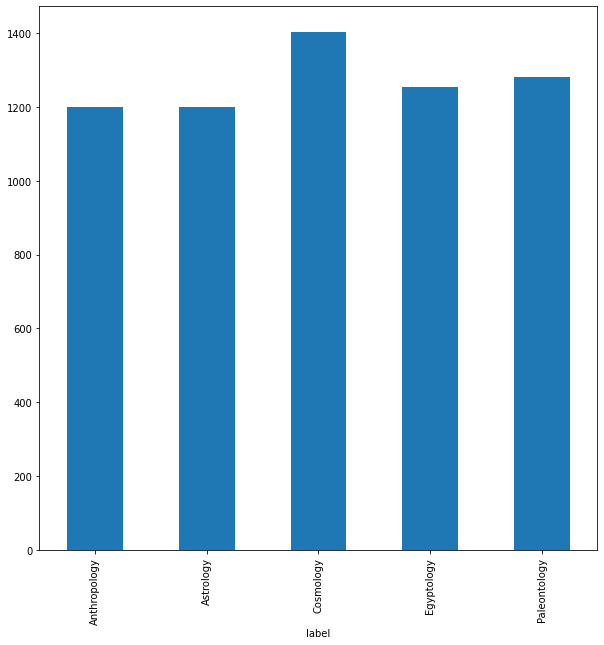

In [103]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
df.groupby('label').stemmed_text.count().plot.bar(ylim= 0)
plt.plot

#Importing our preprocessed notebook.

In [232]:
%run /content/gdrive/My\ Drive/Colab\ Notebooks/Pre_Processing.ipynb

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##Stemming our dataset:

In [233]:
df["stemmed_text"] =df['full_text'].apply(preprocess1)
df.head()

,Unnamed: 0,id_str,full_text,label,label_id,stemmed_text
3348,3348,1517063792240349185,"Next, a timely astrophysics &amp; cosmology re...",Cosmology,2,next time astrophys amp cosmolog read list rec...
1021,1021,1517324571409412096,are emojis hieroglyphs?,Egyptology,0,emoji hieroglyph
1114,1114,1516955506266587136,𓇽\ncode:131FD\nEGYPTIAN HIEROGLYPH N015(Egypti...,Egyptology,0,𓇽 egyptian hieroglyph n egyptian hieroglyph
5013,5013,1519107844439633920,@ginormousblack @Ca1111Cl @GRZK_32 @LoLunaaa @...,Astrology,3,ginormousblack cacl lolunaaa melania gtooowavy...
152,152,1517982273664176133,@GrannyStormcrag @radiokid44 @TMZ I love Egypt...,Egyptology,0,grannystormcrag radiokid tmz love egyptolog ki...


In [102]:

#df.to_csv('stemmed_text.csv')

In [234]:
stemmed_text = df['stemmed_text']     #getting the text column


In [20]:
stemmed_text.head()

6331    countdown join us wednesday am top floor calma...
4830                                   astrolog tweet pop
634     techamaz hieroglyph phonet valu like letter us...
6041     second time prof told major anthropolog ksksksks
643     hieroglyph ink bodi yo bitch wana massag bless...
Name: stemmed_text, dtype: object

In [21]:
print(stemmed_text.shape)

(6338,)


##TFiDF Vectorization:

In [235]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(ngram_range=(1,3),analyzer='word',min_df =2)
X = tfidfvectorizer.fit_transform(stemmed_text)


In [236]:
print(X.shape)
print(label.shape)
X

(6338, 17829)
(6338,)


<6338x17829 sparse matrix of type '<class 'numpy.float64'>'
	with 124025 stored elements in Compressed Sparse Row format>

In [107]:
sparse_matrix = X.toarray()
tfidf_tokens = tfidfvectorizer.get_feature_names_out()
tfidf_tokens

array(['aa', 'aa egyptian', 'aa egyptian hieroglyph', ..., '엑소', '엑소 exo',
       '엑소 exo weareoneexo'], dtype=object)

In [25]:

s1 = []
for s in stemmed_text:
  s1.append(s.split())

#Model Implementation:
## So we'll implement different models on our dataset to predict the class as our output.

In [237]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,label, test_size = .35,shuffle = True, stratify = label, random_state= 42)

**Implementing Random Forest:**

In [238]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier() 
rnd_clf.fit(X_train,y_train)


RandomForestClassifier()

In [239]:
rnd_clf_pred = rnd_clf.predict(X_test)

In [240]:
a_s_rf = accuracy_score(y_test,rnd_clf_pred)*100
a_s_rf

96.89049121225779

**Implementing SVM:**

In [241]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [242]:
svm_pred = svc.predict(X_test)

In [243]:
a_s_svm = accuracy_score(y_test,svm_pred)*100
a_s_svm

97.25101397025688

*Checking our model on new tweet:* 

In [244]:
tweet = 'Scorpio is the best zodiac sign'
tweet = preprocess1(tweet)
vec =  tfidfvectorizer.transform([tweet])
y_pred = svc.predict(vec)
y_pred

array([3])

In [245]:
classes = {2: 'Cosmology', 4 :'Anthropology', 1:'Paleontology', 0 :'Egyptology', 3: 'Astrology'}
classes[y_pred[0]]

'Astrology'

**Lemmatization:**

In [246]:
df["lemmatized_text"] =df['full_text'].apply(preprocess3)
df.head()

,Unnamed: 0,id_str,full_text,label,label_id,stemmed_text,lemmatized_text
3348,3348,1517063792240349185,"Next, a timely astrophysics &amp; cosmology re...",Cosmology,2,next time astrophys amp cosmolog read list rec...,next timely astrophysics amp cosmology reading...
1021,1021,1517324571409412096,are emojis hieroglyphs?,Egyptology,0,emoji hieroglyph,emojis hieroglyph
1114,1114,1516955506266587136,𓇽\ncode:131FD\nEGYPTIAN HIEROGLYPH N015(Egypti...,Egyptology,0,𓇽 egyptian hieroglyph n egyptian hieroglyph,𓇽 egyptian hieroglyph n egyptian hieroglyph
5013,5013,1519107844439633920,@ginormousblack @Ca1111Cl @GRZK_32 @LoLunaaa @...,Astrology,3,ginormousblack cacl lolunaaa melania gtooowavy...,ginormousblack cacl lolunaaa melania gtooowavy...
152,152,1517982273664176133,@GrannyStormcrag @radiokid44 @TMZ I love Egypt...,Egyptology,0,grannystormcrag radiokid tmz love egyptolog ki...,grannystormcrag radiokid tmz love egyptology k...


In [40]:
lemmatized_text = df['lemmatized_text']
lemmatized_text.head()

6331    countdown join u wednesday am top floor calman...
4830                              astrology tweet popping
634     techamazing hieroglyph phonetic value like let...
6041    second time prof told major anthropology ksksksks
643     hieroglyph inked body yo bitch wana massage bl...
Name: lemmatized_text, dtype: object

In [132]:

s2 = []
for s in lemmatized_text:
  s2.append(s.split())

##Importing Pre-Trained models:
**Pre Trained Model - 1:**

In [42]:
!wget http://nlp.stanford.edu/data/glove.6B.zip           #Pre-trained model 1
!unzip -q glove.6B.zip

--2022-05-17 05:58:44--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-05-17 05:58:44--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-05-17 05:58:44--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [195]:
!ls

final_case_study.csv	   glove.twitter.27B.100d.txt
gdrive			   glove.twitter.27B.200d.txt
glove50.model		   glove.twitter.27B.25d.txt
glove50.model.vectors.npy  glove.twitter.27B.25d.word2vec.txt
glove.6B.100d.txt	   glove.twitter.27B.50d.txt
glove.6B.200d.txt	   glove.twitter.27B.zip
glove.6B.300d.txt	   sample_data
glove.6B.50d.txt	   twitter_glove25.model
glove.6B.50d.word2vec.txt  twitter_glove25.model.vectors.npy
glove.6B.zip


In [197]:
fn = "glove.6B.50d.txt"
g_file = open(fn)

In [247]:
model={}
for line in g_file:
    parts = line.split()
    word = parts[0]
    embedding = np.array([float(val) for val in parts[1:]])
    model[word] = embedding

In [248]:
model['university']

array([-1.1082e+00,  1.2916e+00, -7.8751e-01, -4.5955e-01, -4.0788e-01,
       -5.3387e-01, -9.1468e-01, -4.8577e-01, -3.1858e-01, -3.3494e-01,
        5.0093e-01, -5.0392e-01,  2.9449e-02, -1.1748e+00, -4.7245e-01,
        2.7201e-01, -1.1093e-01,  1.0152e+00, -1.0427e+00,  1.4929e+00,
        7.0221e-01,  7.2141e-01, -1.0898e-01, -1.9169e-03, -7.6224e-02,
       -2.5398e+00,  1.2008e-01, -8.6093e-01, -2.1220e+00, -9.0913e-01,
        2.6149e+00, -4.9744e-02, -9.6555e-02, -2.2488e+00, -6.0325e-02,
        8.3282e-03, -1.0552e-01,  1.2435e+00,  1.7389e+00,  6.6512e-01,
       -1.1836e-01, -6.1496e-02, -2.9160e-01,  3.7698e-01, -9.7014e-02,
        4.8428e-01,  3.6570e-01,  2.6268e-01, -5.4315e-01,  3.5944e-02])

In [249]:
!pip install --upgrade gensim

In [200]:
from gensim.scripts.glove2word2vec import glove2word2vec

In [140]:
glove_file = 'glove.6B.50d.txt'
word2vec_glove_file = 'glove.6B.50d.word2vec.txt'
glove2word2vec(glove_file, word2vec_glove_file)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  This is separate from the ipykernel package so we can avoid doing imports until


(400000, 50)

In [201]:
from gensim.models import KeyedVectors

In [256]:
word2vec_glove_file = 'glove.6B.50d.word2vec.txt'
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)
model.save('glove50.model')

In [255]:
model = KeyedVectors.load('glove50.model')

In [213]:
from sklearn.model_selection import train_test_split
X_lemma_train, X_lemma_test, y_lemma_train, y_lemma_test = train_test_split(lemmatized_text,label, test_size = .35,shuffle = True, stratify = label, random_state= 42)


In [202]:
print(lemmatized_text.shape)

(6338,)


##Converting word embeddings to document embeddings..

In [259]:
class Word2VecVectorizer:
  def __init__(self, model):
    
    self.word_vectors = model
    

  def fit(self, data):
    pass

  def transform(self, data):
    # determine the dimensionality of vectors
    v = self.word_vectors.get_vector('king')
    self.D = v.shape[0]

    X = np.zeros((len(data), self.D))
    n = 0
    emptycount = 0
    for sentence in data:
      tokens = sentence.split()
      vecs = []
      m = 0
      for word in tokens:
        try:
          # throws KeyError if word not found
          vec = self.word_vectors.get_vector(word)
          vecs.append(vec)
          m += 1
        except KeyError:
          pass
      if len(vecs) > 0:
        vecs = np.array(vecs)
        X[n] = vecs.mean(axis=0)
      else:
        emptycount += 1
      n += 1
    
    return X


  def fit_transform(self, data):
    self.fit(data)
    return self.transform(data)

In [260]:
# Set a word vectorizer
vectorizer = Word2VecVectorizer(model)
# Get the sentence embeddings for the train dataset
Xtrain = vectorizer.fit_transform(X_lemma_train)
Ytrain = y_lemma_train
# Get the sentence embeddings for the test dataset
Xtest = vectorizer.transform(X_lemma_test)
Ytest = y_lemma_test
Xtrain.shape

(4119, 50)

# Model Evaluation
**Random Forest:**

In [205]:
from sklearn.ensemble import RandomForestClassifier

# create the model, train it, print scores
clf = RandomForestClassifier(n_estimators=200)

clf.fit(Xtrain, Ytrain)

print("train score:", clf.score(Xtrain, Ytrain))
print("test score:", clf.score(Xtest, Ytest))

train score: 0.9992716678805535
test score: 0.7881928796755295


In [206]:
y_pred = clf.predict(Xtest)
score_rfc = accuracy_score(Ytest,y_pred)*100
score_rfc

78.81928796755295

**Support Vector Machines**

In [207]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(Xtrain, Ytrain)

SVC()

In [208]:
svm_pred_1 = svc.predict(Xtest)
score_svc = accuracy_score(Ytest,svm_pred_1)*100
score_svc

83.37088778729157

**Pretrained Model - 2**

In [61]:
!wget http://nlp.stanford.edu/data/glove.twitter.27B.zip
!unzip -q glove.twitter.27B.zip

--2022-05-17 06:05:41--  http://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.twitter.27B.zip [following]
--2022-05-17 06:05:41--  https://nlp.stanford.edu/data/glove.twitter.27B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip [following]
--2022-05-17 06:05:41--  http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [appli

In [62]:
filename = "glove.twitter.27B.25d.txt"
t_file = open(filename)

In [63]:
model_2={}
for line in t_file:
    parts = line.split()
    word = parts[0]
    embedding_2 = np.array([float(val) for val in parts[1:]])
    model_2[word] = embedding_2
#key-value

In [64]:
model_2['university']

array([-5.9489e-01,  3.2037e-01,  2.5788e-01, -1.9004e+00, -6.2420e-01,
       -2.4373e-01,  5.3484e-01, -6.0437e-01,  1.4528e+00, -7.7360e-02,
       -1.4153e-01, -3.3205e-01, -3.3471e+00,  8.9397e-01,  1.6222e+00,
       -1.5817e+00,  6.7911e-02,  2.0891e-01,  2.2955e-01,  2.0345e-01,
       -1.0707e-01, -2.3097e-01, -1.6214e+00, -1.3422e+00,  1.9191e-03])

In [65]:
glove_twitter_file = 'glove.twitter.27B.25d.txt'
word2vec_glove_twitter_file = 'glove.twitter.27B.25d.word2vec.txt'
glove2word2vec(glove_twitter_file, word2vec_glove_twitter_file)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  This is separate from the ipykernel package so we can avoid doing imports until


(1193514, 25)

In [66]:
from sklearn import model_selection
word2vec_glove_file = 'glove.twitter.27B.25d.word2vec.txt'
model_2 = KeyedVectors.load_word2vec_format(word2vec_glove_twitter_file)
model_2.save('twitter_glove25.model')

In [67]:
model_2 = KeyedVectors.load('twitter_glove25.model')

## Creating Document Embeddings:

In [68]:
class Word2VecVectorizer:
  def __init__(self, model_2):
    print("Loading in word vectors...")
    self.word_vectors = model_2
    print("Finished loading in word vectors")

  def fit(self, data):
    pass

  def transform(self, data):
    # determine the dimensionality of vectors
    v = self.word_vectors.get_vector('king')
    self.D = v.shape[0]

    X = np.zeros((len(data), self.D))
    n = 0
    emptycount = 0
    for sentence in data:
      tokens = sentence.split()
      vecs = []
      m = 0
      for word in tokens:
        try:
          # throws KeyError if word not found
          vec = self.word_vectors.get_vector(word)
          vecs.append(vec)
          m += 1
        except KeyError:
          pass
      if len(vecs) > 0:
        vecs = np.array(vecs)
        X[n] = vecs.mean(axis=0)
      else:
        emptycount += 1
      n += 1
    
    return X


  def fit_transform(self, data):
    self.fit(data)
    return self.transform(data)


In [69]:
vectorizer_2 = Word2VecVectorizer(model_2)
# Get the sentence embeddings for the train dataset
Xtrain_2 = vectorizer_2.fit_transform(X_lemma_train)
Ytrain_2 = y_lemma_train
# Get the sentence embeddings for the test dataset
Xtest_2 = vectorizer_2.transform(X_lemma_test)
Ytest_2 = y_lemma_test

Loading in word vectors...
Finished loading in word vectors


**Random Forest:**

In [261]:
from sklearn.ensemble import RandomForestClassifier

# create the model, train it, print scores
clf_2 = RandomForestClassifier(n_estimators=200)

clf_2.fit(Xtrain_2, Ytrain_2)

print("train score:", clf_2.score(Xtrain_2, Ytrain_2))
print("test score:", clf_2.score(Xtest_2, Ytest_2))

train score: 0.9990288905074047
test score: 0.7142857142857143


In [262]:
y_pred_2 = clf_2.predict(Xtest_2)
score_rfc_2 = accuracy_score(Ytest_2,y_pred_2)*100
score_rfc_2

71.42857142857143

**Support Vector Machines :**

In [263]:
from sklearn.svm import SVC
svc_2 = SVC()
svc_2.fit(Xtrain_2, Ytrain_2)

SVC()

In [264]:
svm_pred_2 = svc_2.predict(Xtest_2)
score_2 = accuracy_score(Ytest_2,svm_pred_2)*100
score_2

74.26768814781433

In [74]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df,label, test_size = .35,shuffle = True, stratify = label, random_state= 42)
X_test_new

,Unnamed: 0,id_str,full_text,label,label_id,stemmed_text,lemmatized_text
4764,4764,1519135207374397440,@Kiofofah i thought that said astrology,Astrology,3,kiofofah thought said astrolog,kiofofah thought said astrology
2069,2069,1516481121499942921,Sorry but if you're into the dinosaur/paleonto...,Paleontology,1,sorri fandom your year old,sorry fandom youre year old
5272,5272,1519159602566336512,@RoyOlse93073002 @Matthew17017347 @zodiac_nz @...,Anthropology,4,royols matthew well genius clear never taken c...,royolse matthew well genius clearly never take...
4019,4019,1519243965643595777,"[TW: self-harm, skip this tweet] Mental health...",Astrology,3,tw skip tweet mental health astrolog funni gam...,tw skip tweet mental health astrology funny ga...
6301,6301,1518559439116451840,Genetics &amp; Material Culture Support Repeat...,Anthropology,4,genet amp materi cultur support repeat expans ...,genetics amp material culture support repeated...
...,...,...,...,...,...,...,...
1589,1589,1518105006297305088,"Yes, this is how you reach those who are harde...",Paleontology,1,yes reach harder educ use analog field scienc ...,yes reach harder educate use analogy field sci...
3473,3473,1516779982491721728,"Cosmology facts are so cool, when you tell peo...",Cosmology,2,cosmolog fact cool tell peopl hep fact get rea...,cosmology fact cool tell people hep fact get r...
1018,1018,1517369985886310401,𓀍\ncode:1300D\nEGYPTIAN HIEROGLYPH A011(Egypti...,Egyptology,0,𓀍 egyptian hieroglyph a egyptian hieroglyph,𓀍 egyptian hieroglyph a egyptian hieroglyph
4171,4171,1519214865008631808,Blaming why she cries on astrology is crazy tho😂,Astrology,3,blame cri astrolog crazi,blaming cry astrology crazy


In [75]:
compare = pd.DataFrame(X_test_new)


compare["pred_TFiDF"] = svm_pred
compare["pred_svm_model_1"] = svm_pred_1
compare["pred_svm_model_2"] = svm_pred_2
compare= compare.drop(["stemmed_text","lemmatized_text","Unnamed: 0"],axis = 1)


In [265]:
compare.head(10)

,id_str,full_text,label,label_id,pred_TFiDF,pred_svm_model_1,pred_svm_model_2
4764,1519135207374397440,@Kiofofah i thought that said astrology,Astrology,3,3,3,3
2069,1516481121499942921,Sorry but if you're into the dinosaur/paleonto...,Paleontology,1,1,0,0
5272,1519159602566336512,@RoyOlse93073002 @Matthew17017347 @zodiac_nz @...,Anthropology,4,2,0,0
4019,1519243965643595777,"[TW: self-harm, skip this tweet] Mental health...",Astrology,3,3,3,3
6301,1518559439116451840,Genetics &amp; Material Culture Support Repeat...,Anthropology,4,4,4,2
2645,1518969069994582016,@Dar42 @wisemanryder @TJMair @mirandaisrisen @...,Cosmology,2,2,0,2
1820,1517253848221597701,"@SerpenIllus @AxelSauro Hi,\nI hope you're enj...",Paleontology,1,1,1,2
2415,1517200577566068737,@dhundley1986 @GuitarGuyHaner The shirt is eve...,Paleontology,1,1,1,3
5218,1519194957554270209,hasn’t happened yet but in 2 weeks i will be g...,Anthropology,4,4,4,4
6327,1518532577690271745,Once again the reminder for this event today a...,Anthropology,4,4,4,4


**[0 4 1 2 3] = ['Egyptology' 'Anthropology' 'Paleontology' 'Cosmology' 'Astrology']**

##Comparing different models based on their accuracy score:

In [266]:
pd.DataFrame([['Random_Forest Accuracy Score(%)', a_s_rf,score_rfc,score_rfc_2],['SVM Accuracy Score(%)', a_s_svm,score_svc, score_2 ]], columns = ['Model','Basic Vectorization using :TFiDF', 'Embeddings: Model_1', 'Embeddings: Model_2']).T

,0,1
Model,Random_Forest Accuracy Score(%),SVM Accuracy Score(%)
Basic Vectorization using :TFiDF,96.890491,97.251014
Embeddings: Model_1,78.819288,83.370888
Embeddings: Model_2,71.428571,74.267688


**So from the above comparsion it can be seen that basic vectorization using TFidf gives the best accuracy,**